# Step 0

In [13]:
import pandas as pd

url = "https://data.cityofnewyork.us/resource/xi7c-iiu2.csv"
pop_by_cd = pd.read_csv(url)
pop_by_cd

,borough,cd_number,cd_name,_1970_population,_1980_population,_1990_population,_2000_population,_2010_population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200
5,Bronx,6,"East Tremont, Belmont",114137,65016,68061,75688,83268
6,Bronx,7,"Bedford Park, Norwood, Fordham",113764,116827,128588,141411,139286
7,Bronx,8,"Riverdale, Kingsbridge, Marble Hill",103543,98275,97030,101332,101731
8,Bronx,9,"Soundview, Parkchester",166442,167627,155970,167859,172298
9,Bronx,10,"Throgs Nk., Co-op City, Pelham Bay",84948,106516,108093,115948,120392


# Step 1

In [14]:
# turn the population columns into rows
populations = pd.melt(
    pop_by_cd,
    id_vars=["borough", "cd_number", "cd_name"],
    var_name="year",
    value_name="population",
)

populations["year"] = populations["year"].str.extract(r"(\d{4})").astype(int)

populations

,borough,cd_number,cd_name,year,population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",1970,138557
1,Bronx,2,"Hunts Point, Longwood",1970,99493
2,Bronx,3,"Morrisania, Crotona Park East",1970,150636
3,Bronx,4,"Highbridge, Concourse Village",1970,144207
4,Bronx,5,"University Hts., Fordham, Mt. Hope",1970,121807
...,...,...,...,...,...
290,Queens,13,"Queens Village, Rosedale",2010,188593
291,Queens,14,"The Rockaways, Broad Channel",2010,114978
292,Staten Island,1,"Stapleton, Port Richmond",2010,175756
293,Staten Island,2,"New Springville, South Beach",2010,132003


# Step 2

/var/folders/xs/_cbt3vps1db1zpklk6xw48jh0000gn/T/ipykernel_23942/3789523825.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


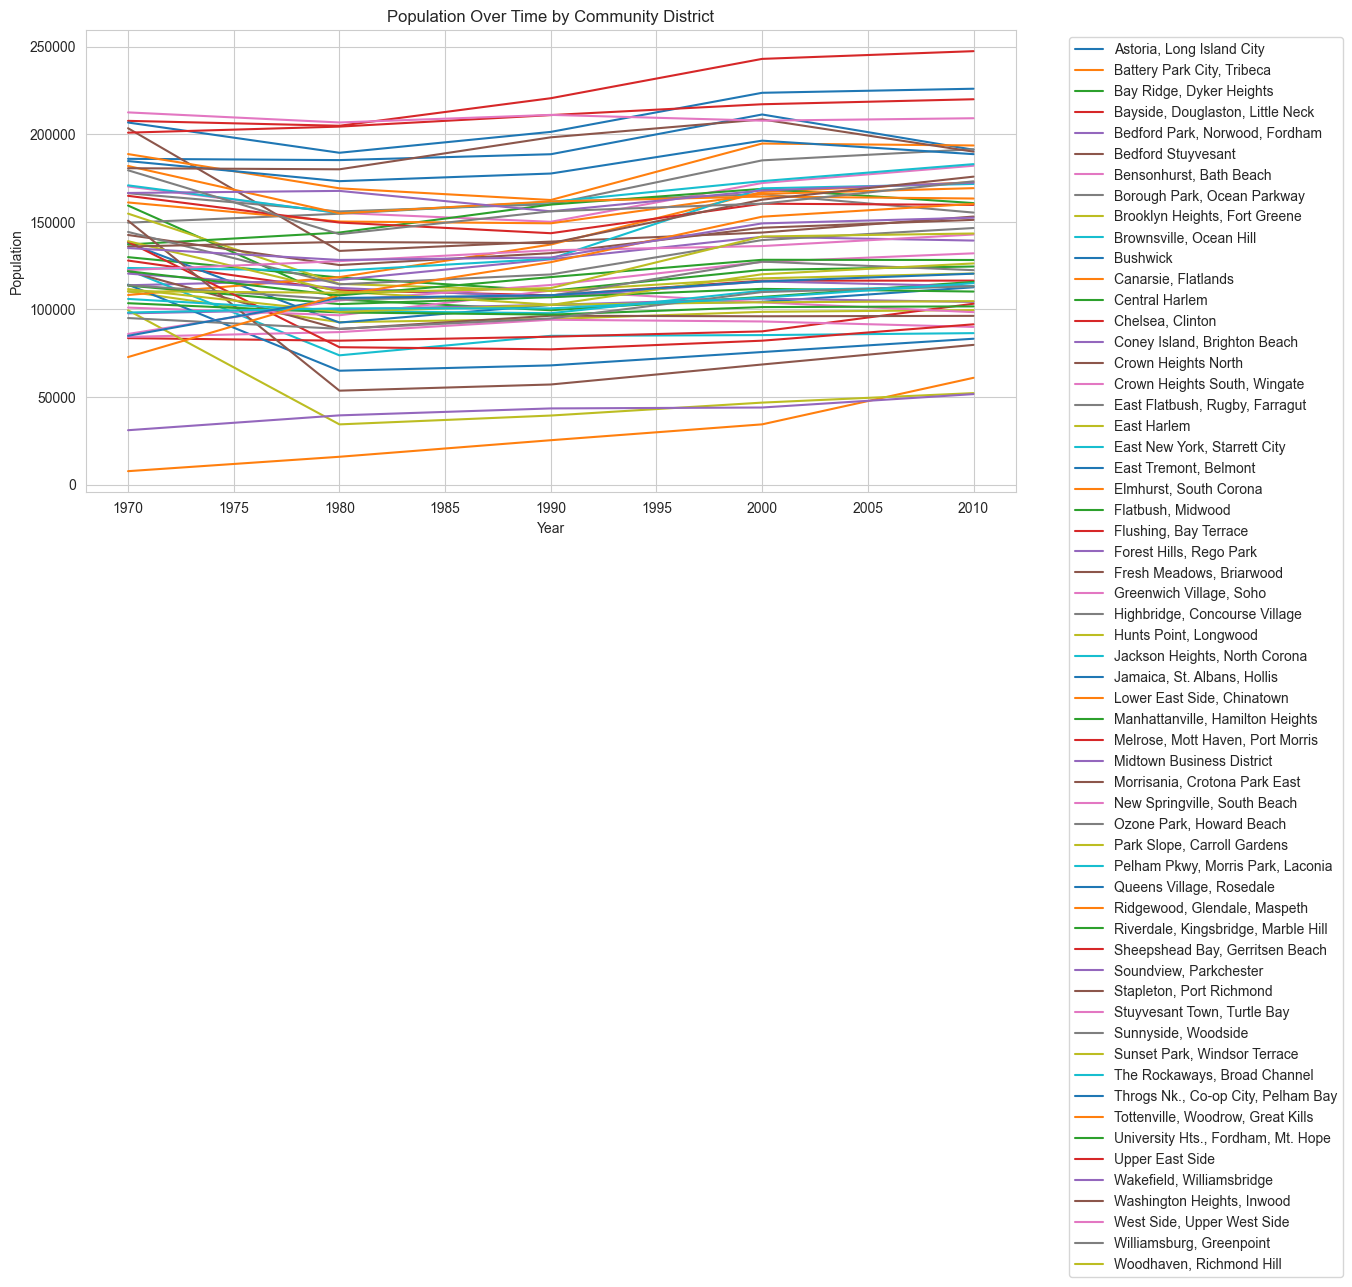

In [15]:
import matplotlib.pyplot as plt

# create one line per CD
plt.figure(figsize=(12, 6))

for cd, group in populations.groupby("cd_name"):
    plt.plot(group["year"], group["population"], label=cd)

plt.title("Population Over Time by Community District")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # puts legend outside
plt.tight_layout()
plt.show()


# Step 3

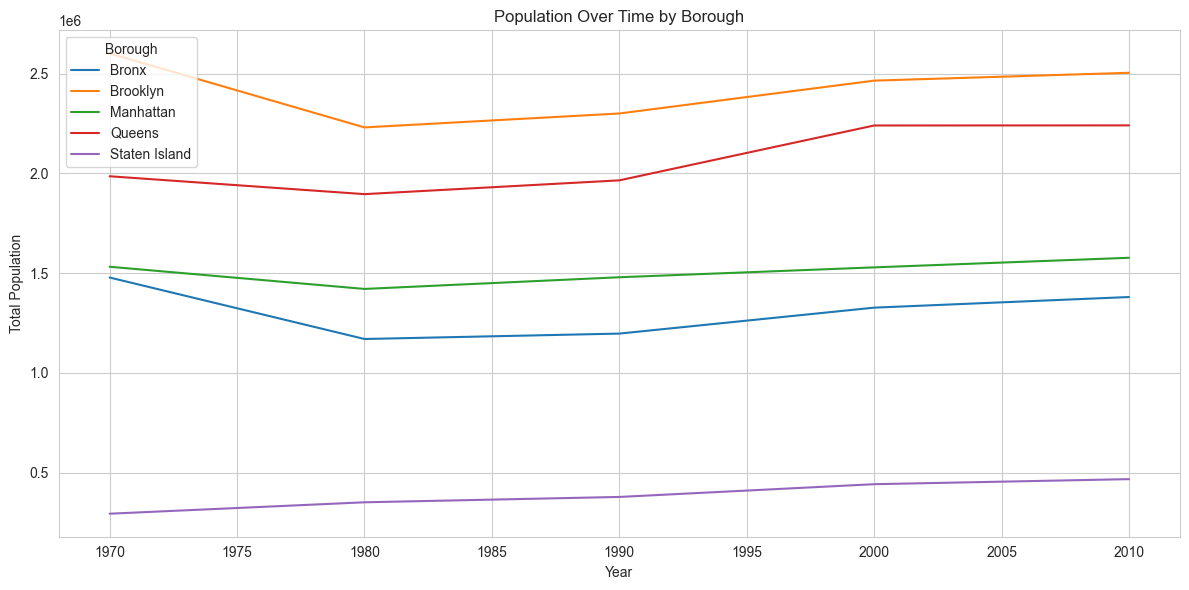

In [17]:
borough_pop = (
    populations
    .groupby(["borough", "year"])["population"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))

for borough, group in borough_pop.groupby("borough"):
    plt.plot(group["year"], group["population"], label=borough)

plt.title("Population Over Time by Borough")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.legend(title="Borough")
plt.tight_layout()
plt.show()